In [1]:
import os
import cv2
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from sklearn.utils import shuffle
import matplotlib.pyplot as plt

# Paths
BASE_DIR = r"C:\Users\syeda\Desktop\code\Crash Detection\Test Dataset"
TRAIN_CSV = os.path.join(BASE_DIR, "train_split.csv")
TEST_CSV = os.path.join(BASE_DIR, "test_split.csv")
MODEL_SAVE_PATH = os.path.join(BASE_DIR, "crash_cnn_model.h5")
IMG_SIZE = 128  # Resize images to 128x128


In [2]:
train_df = pd.read_csv(TRAIN_CSV)
test_df = pd.read_csv(TEST_CSV)

train_df = shuffle(train_df, random_state=42)
test_df = shuffle(test_df, random_state=42)


In [3]:
def load_images(df):
    images = []
    labels = []
    for idx, row in df.iterrows():
        img = cv2.imread(row['image_path'])
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
        img = img / 255.0  # Normalize
        images.append(img)
        labels.append(row['label'])
    return np.array(images), np.array(labels)

X_train, y_train = load_images(train_df)
X_test, y_test = load_images(test_df)

y_train_cat = to_categorical(y_train, num_classes=2)
y_test_cat = to_categorical(y_test, num_classes=2)

print("Training data shape:", X_train.shape, y_train_cat.shape)
print("Testing data shape:", X_test.shape, y_test_cat.shape)


Training data shape: (5297, 128, 128, 3) (5297, 2)
Testing data shape: (1325, 128, 128, 3) (1325, 2)


In [4]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 128)      0

In [5]:
EPOCHS = 10
BATCH_SIZE = 32

history = model.fit(
    X_train, y_train_cat,
    validation_data=(X_test, y_test_cat),
    epochs=EPOCHS,
    batch_size=BATCH_SIZE
)


Epoch 1/10
166/166 [==============================] - 14s 39ms/step - loss: 0.4334 - accuracy: 0.7933 - val_loss: 0.2454 - val_accuracy: 0.9094
Epoch 2/10
166/166 [==============================] - 5s 32ms/step - loss: 0.2177 - accuracy: 0.9133 - val_loss: 0.1374 - val_accuracy: 0.9411
Epoch 3/10
166/166 [==============================] - 5s 31ms/step - loss: 0.1486 - accuracy: 0.9420 - val_loss: 0.1510 - val_accuracy: 0.9426
Epoch 4/10
166/166 [==============================] - 5s 31ms/step - loss: 0.1107 - accuracy: 0.9590 - val_loss: 0.0908 - val_accuracy: 0.9698
Epoch 5/10
166/166 [==============================] - 5s 31ms/step - loss: 0.0865 - accuracy: 0.9692 - val_loss: 0.1046 - val_accuracy: 0.9623
Epoch 6/10
166/166 [==============================] - 5s 31ms/step - loss: 0.0740 - accuracy: 0.9751 - val_loss: 0.0916 - val_accuracy: 0.9675
Epoch 7/10
166/166 [==============================] - 5s 31ms/step - loss: 0.0608 - accuracy: 0.9787 - val_loss: 0.0999 - val_accuracy: 0.972

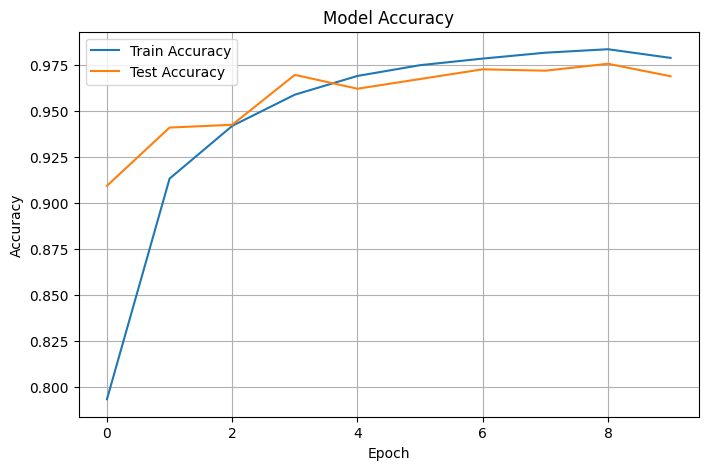

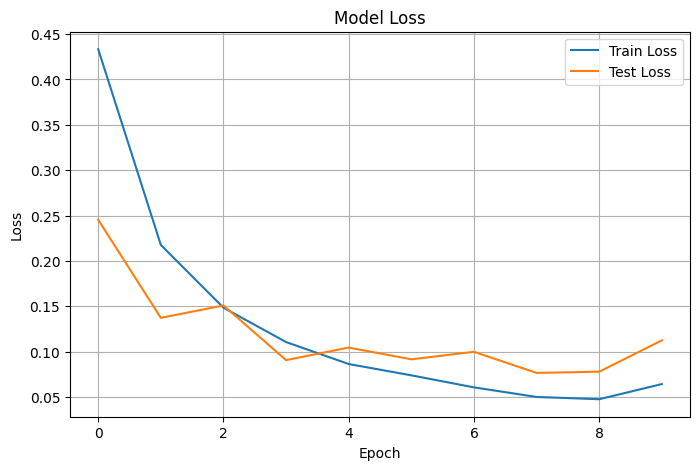

In [6]:
plt.figure(figsize=(8, 5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


In [7]:
model.save(MODEL_SAVE_PATH)
print(f"Model saved to {MODEL_SAVE_PATH}")


Model saved to C:\Users\syeda\Desktop\code\Crash Detection\Test Dataset\crash_cnn_model.h5
